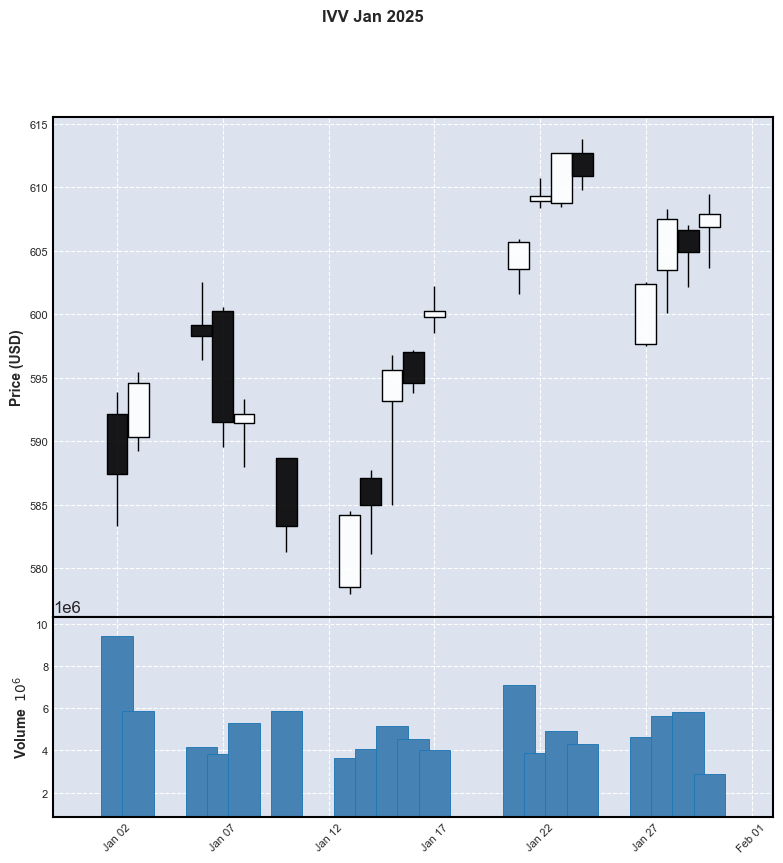

In [17]:
# Part A - Candlestick Chart with Custom Style

import mplfinance as mpf
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# Download data for IVV from January 1, 2025 to January 31, 2025
ticker = yf.Ticker('IVV')
ivv_data = ticker.history(start='2025-01-01', end='2025-01-31')

# Create a new DataFrame and import everything from ivv_data
df = pd.DataFrame(ivv_data)

# Next Step Below 
  
mc = mpf.make_marketcolors(
    up='white',       # white fill for "up" candles
    down='black',     # black fill for "down" candles
    edge={'up': 'black', 'down': 'black'},   # black edges
    wick={'up': 'black', 'down': 'black'},   # black wicks
    volume={'up': 'steelblue', 'down': 'steelblue'}  # black volume bars
)

# Define custom style with black and white colors
my_style = mpf.make_mpf_style(
    base_mpf_style='default',
    marketcolors=mc,
    rc={
        'axes.facecolor': 'white',   # white background for the plot
        'figure.facecolor': 'white'  # white background for the figure
    },
    gridcolor='white',    # gray grid lines
    gridstyle='--'       # dashed grid lines
)

# Plot candlestick chart with custom style
fig, ax = mpf.plot(df, type='candle', style=my_style, title={'title': 'IVV Jan 2025', 'fontsize': 12},
                   ylabel='Price (USD)', volume=True, figsize = (10,10),returnfig=True,show_nontrading=True)

# Move the volume y-axis label to the left
ax[2].yaxis.set_label_position('left')
ax[2].yaxis.tick_left()
ax[2].tick_params(labelsize=8)
ax[2].yaxis.label.set_size(10)

# Move the price y-axis label to the left
ax[0].yaxis.set_label_position('left')
ax[0].yaxis.tick_left()
ax[0].tick_params(labelsize=8)
ax[0].yaxis.label.set_size(10)


plt.show()

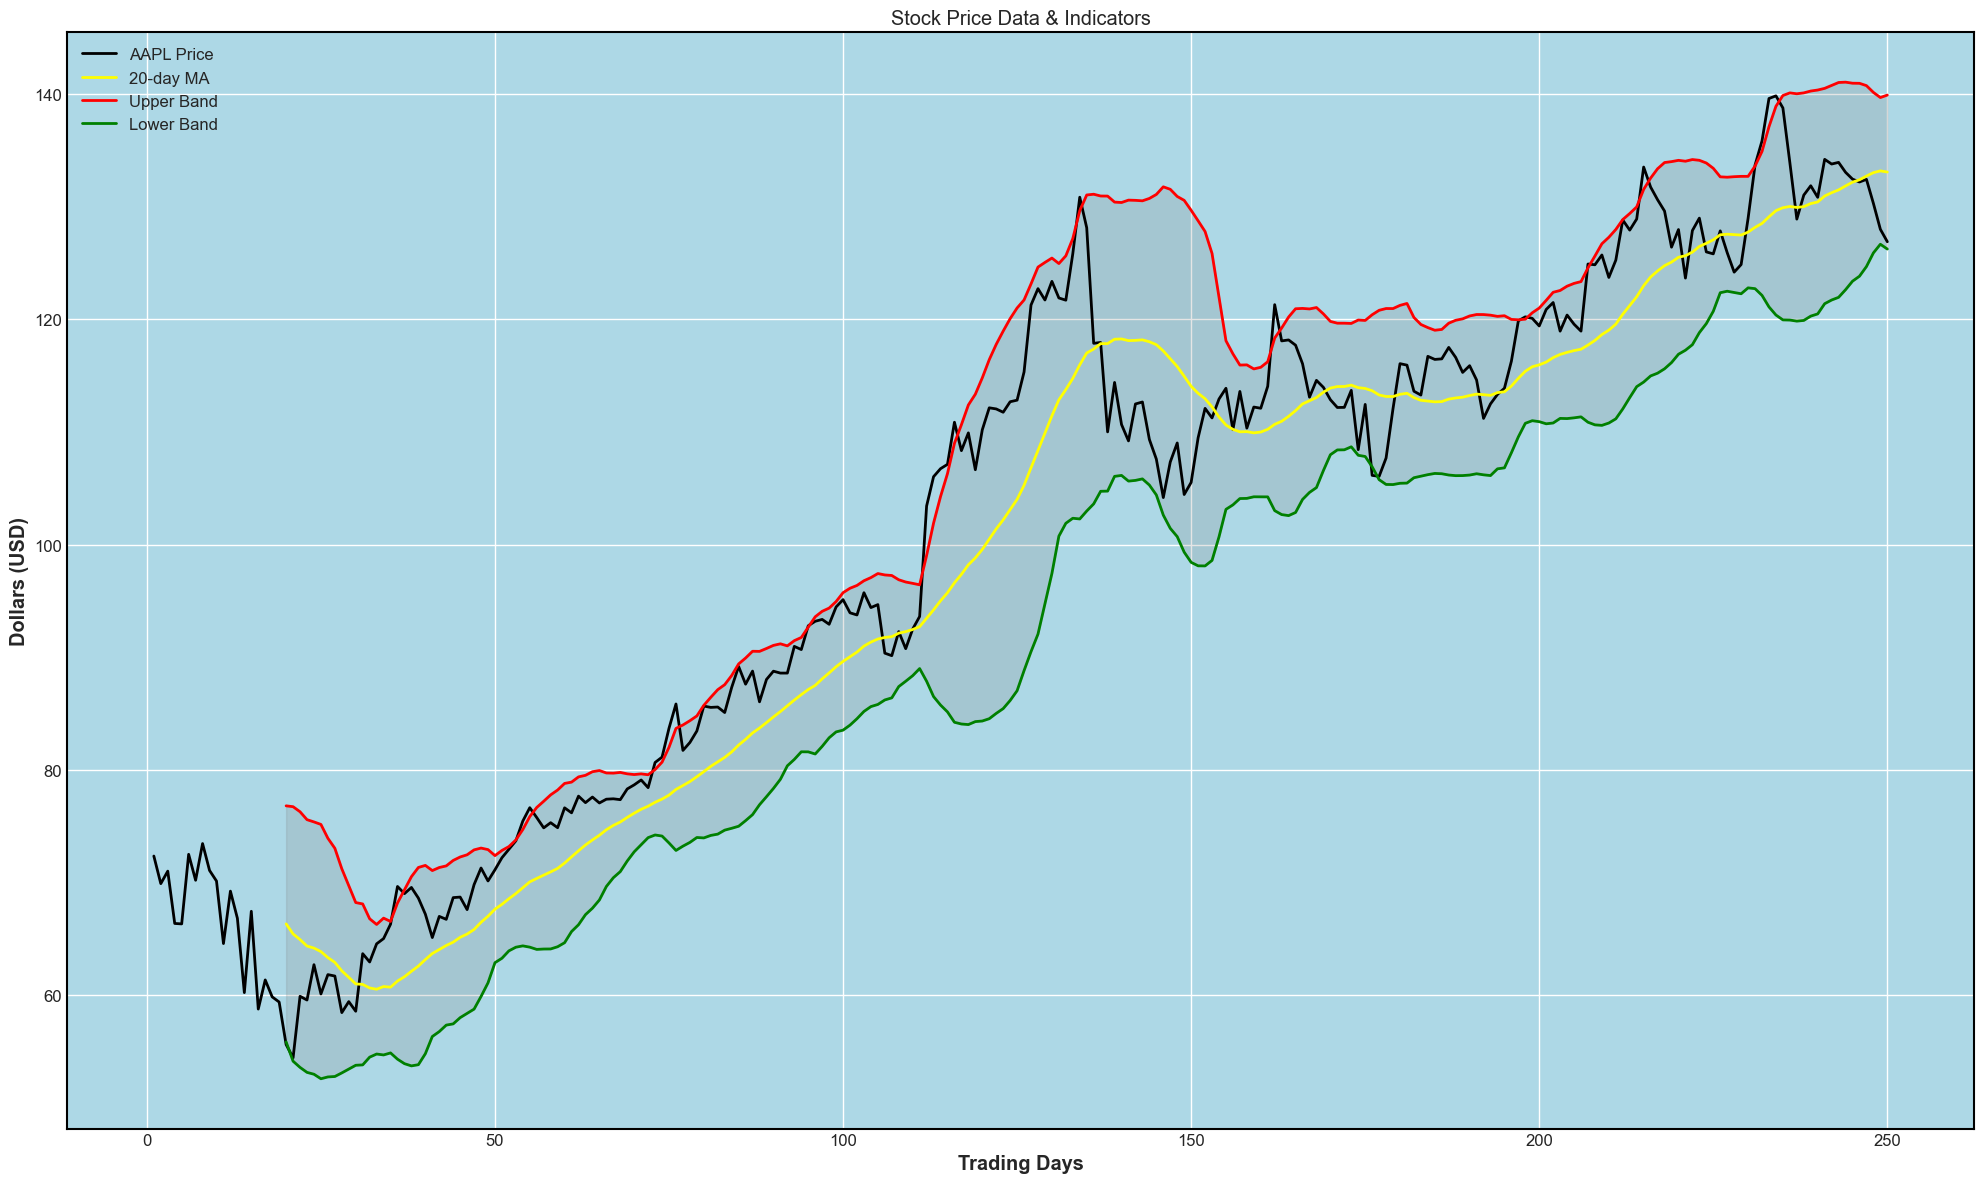

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# read your CSV file into a DataFrame
df = pd.read_csv('StockData.csv')

# 2. Sort by Trading Day 
df.sort_values(by='Trading Day', inplace=True)

# 3. Compute 20-day Moving Average (MA) on the AAPL column
df['MA'] = df['AAPL'].rolling(window=20).mean()

# 4. Compute 20-day POPULATION Standard Deviation (SD)
df['SD'] = df['AAPL'].rolling(window=20).std(ddof=0)

# 5. Compute Upper Band (UB) and Lower Band (LB)
df['UB'] = df['MA'] + 2 * df['SD']
df['LB'] = df['MA'] - 2 * df['SD']

# 6. Take only the first 250 trading days
df_250 = df.iloc[:250]

# 7. Create figure and axes explicitly
fig, ax = plt.subplots(figsize=(20, 12))

# --- Plot Lines ---
ax.plot(df_250['Trading Day'], df_250['AAPL'], label='AAPL Price', color='black')
ax.plot(df_250['Trading Day'], df_250['MA'], label='20-day MA', color='yellow')
ax.plot(df_250['Trading Day'], df_250['UB'], label='Upper Band', color='red')
ax.plot(df_250['Trading Day'], df_250['LB'], label='Lower Band', color='green')

# --- Shade area between Upper and Lower Bands ---
ax.fill_between(df_250['Trading Day'], df_250['UB'], df_250['LB'],
                color='gray', alpha=0.2)

# --- Customize Background & Grid ---
ax.set_facecolor('lightblue')      # Blue background 
ax.set_axisbelow(True)               # Grid lines behind the plot
ax.grid(True, color='white', linestyle='-', linewidth=1)

# --- Title, Labels, Legend ---
ax.set_title('Stock Price Data & Indicators')
ax.set_xlabel('Trading Days')
ax.set_ylabel('Dollars (USD)')
ax.legend(loc='upper left')

fig.tight_layout()
plt.show()
